In [ ]:
# links to the data sets:
# unemployment: https://www.kaggle.com/datasets/tunguz/us-monthly-unemployment-rate-1948-present?resource=download
# CPI: https://www.kaggle.com/datasets/aavigan/consumer-price-index-usa-all-items
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error as mse


upload = files.upload()



Saving USACPIALLMINMEI.csv to USACPIALLMINMEI.csv
Saving USUnemployment.csv to USUnemployment.csv


**Data Preparation**

In [ ]:

data = pd.read_csv('USUnemployment.csv')

# initializes a new empty dataframe for the new format
new_data = pd.DataFrame(columns=['Date', 'Unemployment Rates'])

# iterates through each row in the original USUnemployment.csv file
for index, row in data.iterrows():
    year = int(row['Year']) # makes sure the year will be an int value
    for month, month_name in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], start=1):
        date = f'{year}-{month:02d}-01' # this combines the years and months into a single date string in the YYYY-MM-DD format
        unemployment = row[month_name] # this gets the unemployment value for the current corresponding date
        new_row = pd.DataFrame({'Date': [date], 'Unemployment Rates': [unemployment]})  # this adds a new row to initially empty new_data
        new_data = pd.concat([new_data, new_row], ignore_index=True) # appends/concatenates the data to the newly added line


CPI = pd.read_csv("USACPIALLMINMEI.csv", index_col=False)

#iterate through CPI and calculate infaltion from it

for i in range(len(CPI)-1, 11, -1):
  CPI.iloc[i, 1] = round(((((CPI.iloc[i, 1]-CPI.iloc[i-12, 1])/CPI.iloc[i-12, 1])*100)), 4)

CPI = CPI.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# join the two data frames
merged_df = CPI.merge(new_data, left_on = 'DATE', right_on = 'Date')

X = np.array(merged_df["Unemployment Rates"]).reshape(-1, 1)
y = merged_df["USACPIALLMINMEI"]


**Cleaned Data Visualization**

Text(0, 0.5, 'Inflation Rate')

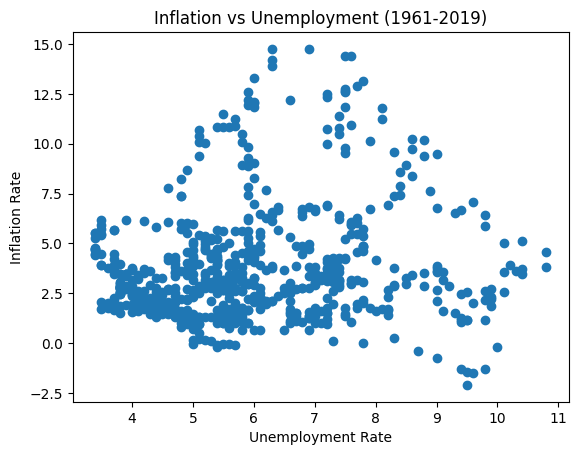

In [ ]:
plt.plot(X, y, "o")
plt.title("Inflation vs Unemployment (1961-2019)")
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")

**Determining Best Fit Model**

In [ ]:
def find_best_fit(X, y, model):
  TempDict = {}

  if model == "KNN":

    for k in range(1, len(X)):
      yhat = KNeighborsRegressor(n_neighbors = k).fit(X, y).predict(X)
      TempDict[round(mse(X, yhat), 4)] = k

    minK = TempDict[min(TempDict.keys())]
    yhat = KNeighborsRegressor(n_neighbors = minK).fit(X, y).predict(X)

    return yhat, minK, round(mse(X, yhat), 4)

  elif model == "DT":

    for d in range(1, 11):
      yhat = DecisionTreeRegressor(max_depth = d).fit(X, y).predict(X)
      TempDict[round(mse(X, yhat), 4)] = d

    minD = TempDict[min(TempDict.keys())]
    yhat = DecisionTreeRegressor(max_depth = minD).fit(X, y).predict(X)

    return yhat, minD, round(mse(X, yhat), 4)


**Best Fit Models for Entire Data Set**

In [ ]:
yhat_KNN, minK, MSE_KNN = find_best_fit(X, y, "KNN")
yhat_DT, minD, MSE_DT = find_best_fit(X, y, "DT")

**Visualizing Models on entire Data set**

Text(0.5, 1.0, 'Unemployment vs Inflation (1961-2019)')

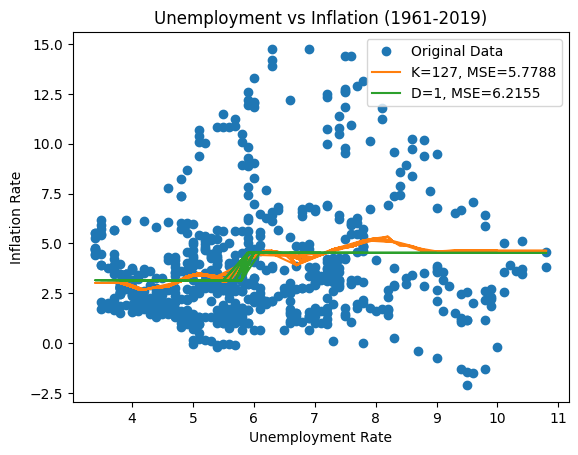

In [ ]:

plt.plot(X, y, "o")
plt.plot(X, yhat_KNN)
plt.plot(X, yhat_DT)
plt.legend(["Original Data", f"K={minK}, MSE={MSE_KNN}", f"D={minD}, MSE={MSE_DT}"])
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")
plt.title("Unemployment vs Inflation (1961-2019)")

**Fitting Models to Shorter Increments of Data**

In [ ]:
TimeFrame = (480, 600) #(lower bound, upper bound) in months

X1 = np.array(merged_df["Unemployment Rates"][TimeFrame[0]:TimeFrame[1]]).reshape(-1, 1)
y1 = merged_df["USACPIALLMINMEI"][TimeFrame[0]:TimeFrame[1]]
date = f"{merged_df.iloc[TimeFrame[0], 0][:4]} - {merged_df.iloc[TimeFrame[1], 0][:4]}"

yhat_KNN1, mink1, MSE_KNN1 = find_best_fit(X1, y1, "KNN")
yhat_DT1, mind1, MSE_DT1 = find_best_fit(X1, y1, "DT")

**Visualizing Models**

Text(0.5, 0, 'Unemployment Rate')

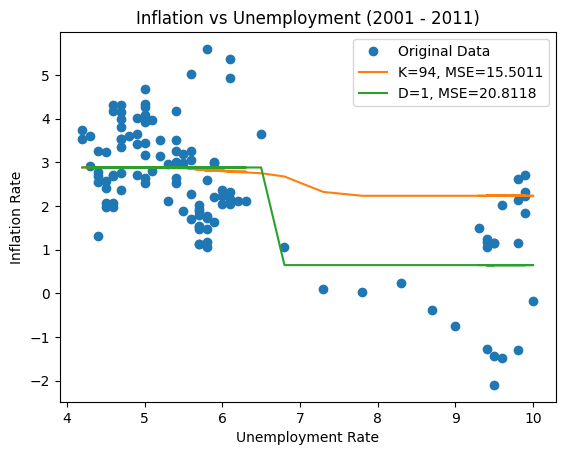

In [ ]:

plt.plot(X1, y1, "o")
plt.plot(X1, yhat_KNN1)
plt.plot(X1, yhat_DT1)
plt.legend(["Original Data",f"K={mink1}, MSE={MSE_KNN1}", f"D={mind1}, MSE={MSE_DT1}"])
plt.title(f"Inflation vs Unemployment ({date})")
plt.ylabel("Inflation Rate")
plt.xlabel("Unemployment Rate")

**Prediction for March 2023**

In [ ]:
# Using Full Time Frame Model:
print(KNeighborsRegressor(n_neighbors = minK).fit(X, y).predict(pd.array([3.5]).reshape(-1, 1)))
# Using the Shor Time Frame Model:
print(KNeighborsRegressor(n_neighbors = mink1).fit(X1, y1).predict(pd.array([3.5]).reshape(-1, 1)))

[3.01902835]
[2.88411596]
